In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import KFold

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


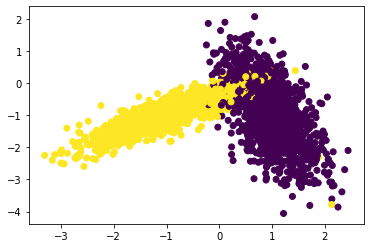

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [0]:
import numpy as np
import pandas as pd
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  params = np.random.uniform(param_range[0],param_range[1],10)
  params = np.array([int(i) for i in params])
  params = np.sort(params)
  #params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
  # Reference link : https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
  kf = KFold(n_splits=folds)

  x_train = pd.DataFrame(x_train)
  y_train = pd.DataFrame(y_train)
  print(x_train.shape)
  print(y_train.shape)

  TRAIN_SCORES = []
  TEST_SCORES  = [] 
  for p in params:

    training_scores = []
    crossval_scores = []
    classifier.n_neighbors = int(p)

    for i in range(folds):
      result = next(kf.split(x_train),None)
      x_training = x_train.iloc[result[0]]
      x_cv = x_train.iloc[result[1]]
      print("Training shape ",x_training.shape)
      print("Crossval shape shape ",x_cv.shape)

      y_training = y_train.iloc[result[0]]
      y_cv = y_train.iloc[result[1]]
      
      model = classifier.fit(x_training,y_training)

      training_scores.append(model.score(x_training,y_training))
      crossval_scores.append(model.score(x_cv,y_cv))
    TRAIN_SCORES.append(np.mean(training_scores))
    TEST_SCORES.append(np.mean(crossval_scores))
  return(TRAIN_SCORES , TEST_SCORES)
     


In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier()
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train_score , cv_scores = RandomSearchCV(X_train,y_train,classifier,(1,21),8)


(7500, 2)
(7500, 1)
Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training shape  (6562, 2)
Crossval shape shape  (938, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


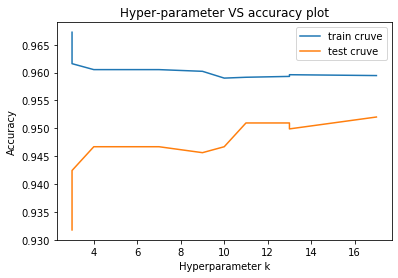

In [141]:
# 6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
import matplotlib.pyplot as plt
params = np.random.uniform(1,21,10)
params = np.array([int(i) for i in params])
params = np.sort(params)
#params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(params,train_score, label='train cruve')
plt.plot(params,cv_scores, label='test cruve')
plt.xlabel("Hyperparameter k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

As per different different experements 13 is best value of K

Adding Decision boundries

In [0]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

In [0]:
from matplotlib.colors import ListedColormap

In [144]:
neigh = KNeighborsClassifier(n_neighbors = 13)
neigh.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [0]:
X1 = np.array(X_train[0])
X2 = np.array(X_train[1])
y = np.array(y_train)
y = [j for sub in y for j in sub]

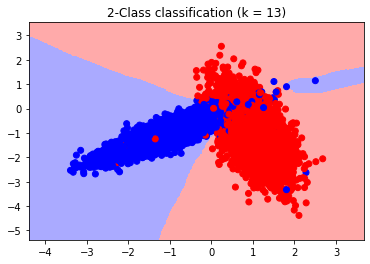

In [146]:
plot_decision_boundary(X1,X2,y, neigh)